# Module 7: Supervised learning
* навчитися використовувати моделі з учителем

### Завдання 1:
    Для цього завдання ми будемо вивчати загальнодоступні дані з [LendingClub.com](www.lendingclub.com)
   
   _Кредитний клуб пов'язує людей, яким потрібні гроші (позичальники), та людей, які мають гроші (інвесторів). Сподіваємось, як інвестор ви хотіли б інвестувати в людей, які продемонстрували, що вони мають високу ймовірність повернути вам гроші. Ми спробуємо створити модель, яка допоможе це передбачити.
   Кредитний клуб мав [дуже цікавий 2016 рік](https://en.wikipedia.org/wiki/Lending_Club#2016), тож давайте перевіримо деякі їх дані.
   Ми використовуватимемо дані про позики за 2007-2010 роки та намагатимемося класифікувати та прогнозувати, чи повертав позичальник їх повністю._   

**Ось що представляють стовпці:**  
**`credit.policy`**:   
  1, якщо клієнт відповідає критеріям андеррайтингу кредитів LendingClub.com, і 0 в іншому випадку  

**`purpose`**: 
  мета позики (приймає значення \"кредитна_карта\", \"консолідація боргу\", \"освітня\", \"основна_покупка\", \"малий бізнес\" та \"всі_інші\")  

**`int.rate`**: процентна ставка позики, пропорційно (ставка 11% зберігатиметься як 0,11). Позичальникам, які LendingClub.com вважає більш ризикованими, призначаються вищі процентні ставки.  

**`installment`**: щомісячні виплати позичальника, якщо позика фінансується  

**`log.annual.inc`**: журнал річного доходу позичальника, який самостійно звітується. 

**`dti`**: відношення боргу до доходу позичальника (сума боргу, поділена на річний дохід).

**`fico`**: кредитний рейтинг позичальника FICO.

**`days.with.cr.line`**: кількість днів, коли позичальник мав кредитну лінію

**`revol.bal`**: кредитний залишок позичальника (сума не виплачена в кінці циклу виставлення рахунків за кредитною карткою).

**`revol.util`**: коефіцієнт використання кридитної лінії позичальника (сума використаної кредитної лінії відносно загальної кількості доступних кредитів).

**`inq.last.6mths`**: кількість запитів позичальників з боку кредиторів за останні 6 місяців.

**`delinq.2yrs`**: кількість разів, протягом яких позичальник прострочував платежі протягом останніх 2 років понад 30 днів.

**`pub.rec`**: кількість публічних записів (заяви про банкрутство, податкова застава або рішення).

1. Відкрийте файл та виведіть описову статистику

In [2]:
import pandas as pd
df = pd.read_csv(r"C:/Users/Home/MainAcademy/loan_data.csv")
df.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [3]:
df

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0,all_other,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0,1
9574,0,all_other,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0,1
9575,0,debt_consolidation,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0,1
9576,0,home_improvement,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,0,0,1


2. Створіть дві гістограми по полю fico (перша для значень not.fully.paid=0, друга = 1). Гістограми накладіть одна на одну.

<AxesSubplot:>

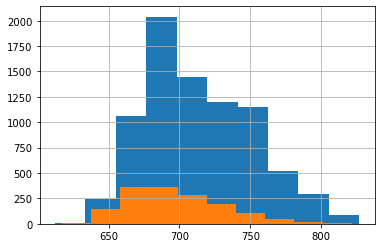

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

nfp0 = df['fico'][df['not.fully.paid'] == 0 ]
nfp1 = df['fico'][df['not.fully.paid'] == 1 ]
nfp0.hist()
nfp1.hist()


3. Відобразіть тенденцію між оцінкою fico та int.rate. Використайте jointplot

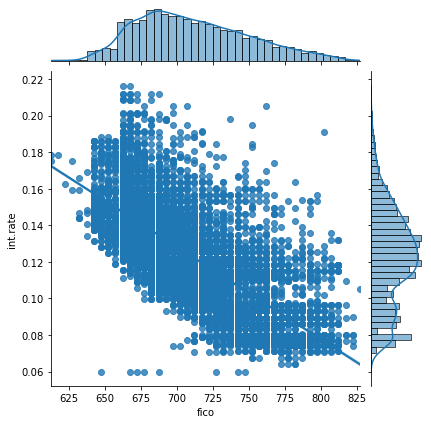

In [5]:
sns.jointplot(x = df['fico'], y = df['int.rate'], kind = "reg")

4. Побудуйте графік lmplot на основі int.rate та fico. Коліром розідліть по полю credit.policy. Розбийте по значеннях цільової функції

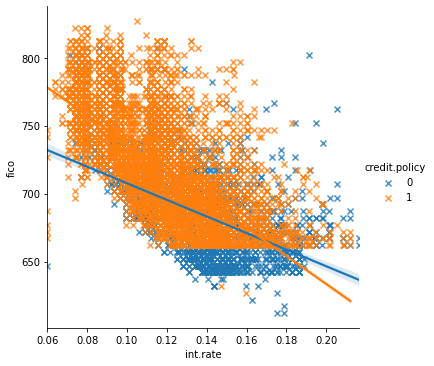

In [6]:
sns.lmplot(x = 'int.rate', y = 'fico', data = df, hue = 'credit.policy', markers=["x", "x"])

5. purpose є категорієї, тому варто перетворити за допомогою pd.get_dummies

In [7]:
df = pd.get_dummies(df, columns=['purpose'])
df

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_all_other,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0,1,1,0,0,0,0,0,0
9574,0,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0,1,1,0,0,0,0,0,0
9575,0,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0,1,0,0,1,0,0,0,0
9576,0,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,0,0,1,0,0,0,0,1,0,0


6. Розбийте датасет на тестві та трейнові дані

In [8]:
import sklearn as skl
import sklearn.metrics as metr
from sklearn.model_selection import train_test_split

y = df["credit.policy"]
X = df.drop('credit.policy', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


7. Використайте для задачі класифікації такі моделі: дерево рішень, логістична регресія, random forest, XGBoost  
8. Для кожної з моделей виведіть матрицю, основні метрики

## DecisionTree

### DecisionTreeClassifier

In [49]:
from sklearn.tree import DecisionTreeClassifier

d_tree_class = DecisionTreeClassifier(max_depth=10)
d_tree_class.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10)

In [50]:
y_pred = d_tree_class.predict(X_test)
y_pred

array([1, 0, 1, ..., 1, 1, 0], dtype=int64)

In [59]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test, y_pred))
des_tree_m = confusion_matrix(y_test, y_pred)
print(des_tree_m)

              precision    recall  f1-score   support

           0       1.00      0.96      0.98       371
           1       0.99      1.00      1.00      1545

    accuracy                           0.99      1916
   macro avg       1.00      0.98      0.99      1916
weighted avg       0.99      0.99      0.99      1916

[[ 358   13]
 [   0 1545]]


### DecisionTreeRegressor

In [45]:
from sklearn.tree import DecisionTreeRegressor

regressor = DecisionTreeRegressor(max_depth=10)
regressor.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=10)

In [46]:
y_pred = regressor.predict(X_test)

In [47]:
accuracy = pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
accuracy

,Actual,Predicted
3400,1,0.999045
8577,0,0.000000
5364,1,0.999045
458,1,0.999045
1618,1,0.999045
...,...,...
7924,0,0.000000
9272,0,0.000000
2927,1,0.999045
7020,1,0.999045


In [48]:
from sklearn import metrics
import numpy as np

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.01168340633490838
Mean Squared Error: 0.008516541732557526
Root Mean Squared Error: 0.0922851111098509


Text(526.5393839003165, 793.0164705882353, 'X[4] <= 659.5\nmse = 0.086\nsamples = 6672\nvalue = 0.905')

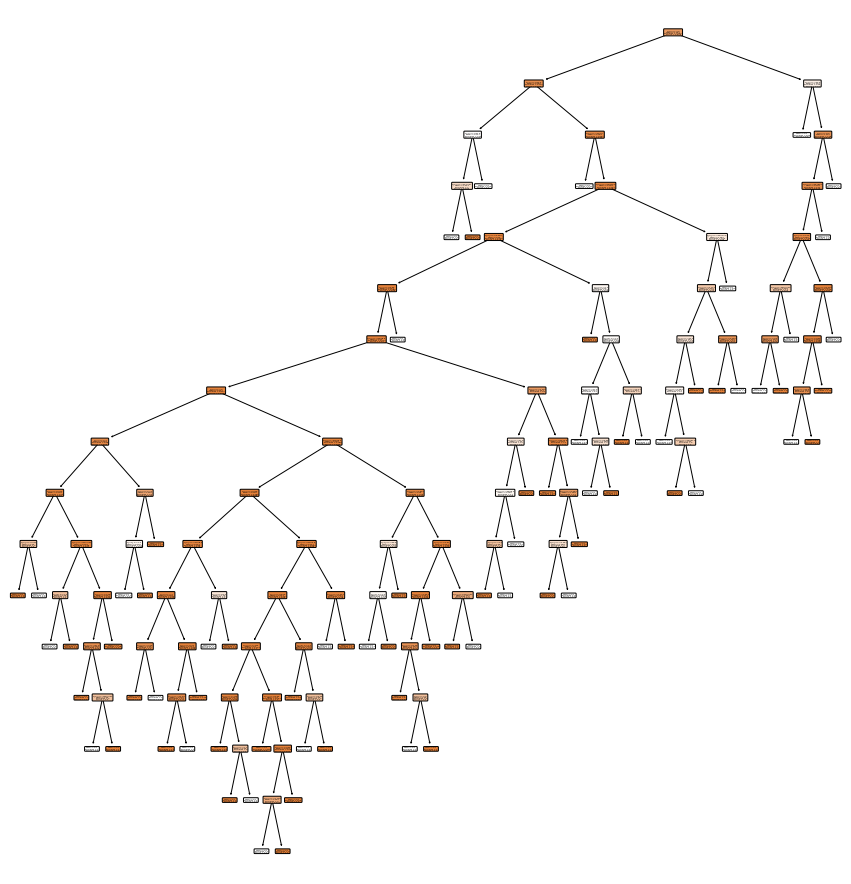

In [19]:
from sklearn import tree
plt.figure(figsize=(15,16)) 

tree.plot_tree(regressor, filled=True,  rounded=True)[1]

## LogisticRegression

In [60]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(solver='lbfgs', max_iter=1000)
log_reg.fit(X_train,y_train)

log_reg.score(X_train, y_train)
log_reg.score(X_test, y_test)
y_predictions = log_reg.predict(X_test)

print(metrics.accuracy_score(y_test,y_predictions))
print(classification_report(y_test,y_predictions))
log_reg_m = confusion_matrix(y_test, y_pred)
print(log_reg_m)

0.8961377870563675
              precision    recall  f1-score   support

           0       0.82      0.59      0.69       371
           1       0.91      0.97      0.94      1545

    accuracy                           0.90      1916
   macro avg       0.87      0.78      0.81      1916
weighted avg       0.89      0.90      0.89      1916

[[ 358   13]
 [   0 1545]]


## LinearRegression

In [61]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

print(lin_reg.coef_)
print(lin_reg.score(X_train, y_train))
print(metrics.accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
lin_reg_m = confusion_matrix(y_test, y_pred)
print(lin_reg_m)

[-1.18342498e+00  1.07770636e-04  4.81708036e-02  4.27505363e-04
  2.32011865e-03  5.44429815e-06 -2.81811777e-06  1.21868608e-03
 -8.39948799e-02 -1.07529934e-02  1.50208284e-02 -4.22814002e-02
 -2.67276696e-02 -1.02309110e-02  7.06230955e-03 -1.53837821e-02
  4.95194758e-03  3.19118774e-03  3.71369177e-02]
0.4029411032836122
0.9932150313152401
              precision    recall  f1-score   support

           0       1.00      0.96      0.98       371
           1       0.99      1.00      1.00      1545

    accuracy                           0.99      1916
   macro avg       1.00      0.98      0.99      1916
weighted avg       0.99      0.99      0.99      1916

[[ 358   13]
 [   0 1545]]


## Random forest

In [62]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=10, max_depth=10, random_state=40)
rfc.fit(X_train, y_train)
rfc_pred = rfc.predict(X_test)

print(rfc.score(X_train, y_train))
print(rfc.score(X_test, y_test))
print(classification_report(y_test, rfc_pred))
ran_for_m = confusion_matrix(y_test, rfc_pred)
print(ran_for_m)

0.9909945184025059
0.9832985386221295
              precision    recall  f1-score   support

           0       0.96      0.95      0.96       371
           1       0.99      0.99      0.99      1545

    accuracy                           0.98      1916
   macro avg       0.98      0.97      0.97      1916
weighted avg       0.98      0.98      0.98      1916

[[ 352   19]
 [  13 1532]]


## XGBoost

In [64]:
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

bst = xgb.XGBClassifier(n_estimators=10, max_depth=10, random_state=40)
bst.fit(X_train, y_train)
y_pred = bst.predict(X_test)

print(bst.score(X_train,y_train))
print(bst.score(X_test,y_test))
print(classification_report(y_test,y_pred))
xgb_m = confusion_matrix(y_test,y_pred)
print(xgb_m)

[19:47:56] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0.997128687026886
0.9932150313152401
              precision    recall  f1-score   support

           0       0.99      0.98      0.98       371
           1       0.99      1.00      1.00      1545

    accuracy                           0.99      1916
   macro avg       0.99      0.99      0.99      1916
weighted avg       0.99      0.99      0.99      1916

[[ 363    8]
 [   5 1540]]


9. Використайте ансамбель voting для всіх моделей

## VotingClassifier

In [56]:
from sklearn.ensemble import VotingClassifier

VR = VotingClassifier(estimators=[('1', d_tree_class), ('2', log_reg), ('3', rfc)])
VR.fit(X,y)

VotingClassifier(estimators=[('1', DecisionTreeClassifier(max_depth=10)),
                             ('2', LogisticRegression(max_iter=1000)),
                             ('3',
                              RandomForestClassifier(max_depth=10,
                                                     n_estimators=10,
                                                     random_state=40))])

In [65]:
y_pred = VR.predict(X_test)

print(VR.score(X_train,y_train))
print(VR.score(X_test,y_test))
voting_m = confusion_matrix(y_test,y_prediction)
print(voting_m)

0.9929522317932654
0.9932150313152401
[[ 360   11]
 [   5 1540]]


10. Порівняйте результати моделей та зробіть висновки

In [67]:
print(f'DecisionTreeClassifier\n{des_tree_m}\n')
print(f'LogisticRegression\n{log_reg_m}\n')
print(f'LinearRegression\n{lin_reg_m}\n')
print(f'RandomForestClassifier\n{ran_for_m}\n')
print(f'XGBClassifier\n{xgb_m}\n')
print(f'VotingClassifier\n{voting_m}')

DecisionTreeClassifier
[[ 358   13]
 [   0 1545]]

LogisticRegression
[[ 358   13]
 [   0 1545]]

LinearRegression
[[ 358   13]
 [   0 1545]]

RandomForestClassifier
[[ 352   19]
 [  13 1532]]

XGBClassifier
[[ 363    8]
 [   5 1540]]

VotingClassifier
[[ 360   11]
 [   5 1540]]


### Висновки:
- найкращий результат дала модель XGBClassifier, а найгірший - RandomForestClassifier
- в результаті об'еднання моделей DecisionTreeClassifier, LogisticRegression та RandomForestClassifier результат прогнозу покращився 

### Завдання 2:
    Просте завдання на обробку часових рядів.
    Потрібно вивести наступну інформацію:
    
"url = \"https://raw.githubusercontent.com/dm-fedorov/pandas_basic/master/%D0%B1%D1%8B%D1%81%D1%82%D1%80%D0%BE%D0%B5%20%D0%B2%D0%B2%D0%B5%D0%B4%D0%B5%D0%BD%D0%B8%D0%B5%20%D0%B2%20pandas/data/air_quality_no2_long.csv\""
  

In [68]:
url = "https://raw.githubusercontent.com/dm-fedorov/pandas_basic/master/%D0%B1%D1%8B%D1%81%D1%82%D1%80%D0%BE%D0%B5%20%D0%B2%D0%B2%D0%B5%D0%B4%D0%B5%D0%BD%D0%B8%D0%B5%20%D0%B2%20pandas/data/air_quality_no2_long.csv"

df_2 = pd.read_csv(url)
df_2

,city,country,date.utc,location,parameter,value,unit
0,Paris,FR,2019-06-21 00:00:00+00:00,FR04014,no2,20.0,µg/m³
1,Paris,FR,2019-06-20 23:00:00+00:00,FR04014,no2,21.8,µg/m³
2,Paris,FR,2019-06-20 22:00:00+00:00,FR04014,no2,26.5,µg/m³
3,Paris,FR,2019-06-20 21:00:00+00:00,FR04014,no2,24.9,µg/m³
4,Paris,FR,2019-06-20 20:00:00+00:00,FR04014,no2,21.4,µg/m³
...,...,...,...,...,...,...,...
2063,London,GB,2019-05-07 06:00:00+00:00,London Westminster,no2,26.0,µg/m³
2064,London,GB,2019-05-07 04:00:00+00:00,London Westminster,no2,16.0,µg/m³
2065,London,GB,2019-05-07 03:00:00+00:00,London Westminster,no2,19.0,µg/m³
2066,London,GB,2019-05-07 02:00:00+00:00,London Westminster,no2,19.0,µg/m³


1. Виведіть список унікальних міст з датасету

In [69]:
uni = df_2['city'].unique()
for x in uni:
    print(x)

Paris
Antwerpen
London


2. Виведіть дату початку та кінця ведення даних

In [70]:
start = min(df_2['date.utc'])
stop = max(df_2['date.utc'])

print(f'Введення даних:\nпочаток - {start}\nкінець - {stop}')

Введення даних:
початок - 2019-05-07 01:00:00+00:00
кінець - 2019-06-21 00:00:00+00:00


3. Яка середня конценрація $NO_2$ для кожного дня тижня і міста (виведіть таблицю)

In [71]:
import datetime as dt

df_2['day'] = (pd.to_datetime(df_2['date.utc'])).dt.day_name()
df_2.groupby(['day', 'city' ]).mean()['value']

day        city     
Friday     Antwerpen    28.400000
           London       26.446809
           Paris        31.617986
Monday     Antwerpen    27.875000
           London       23.969697
           Paris        24.856250
Saturday   Antwerpen    33.500000
           London       24.977612
           Paris        25.266154
Sunday     Antwerpen    21.896552
           London       24.859155
           Paris        23.274306
Thursday   Antwerpen    27.500000
           London       24.780142
           Paris        28.600690
Tuesday    Antwerpen    22.214286
           London       24.885714
           Paris        30.999359
Wednesday  Antwerpen    21.125000
           London       23.460432
           Paris        29.165753
Name: value, dtype: float64

4. Яке середнє значення для кожної години (виведіть стовбчикову діаграму)

<AxesSubplot:xlabel='hour', ylabel='Mean NO2 concentration'>

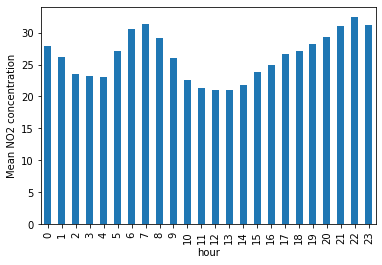

In [72]:
import matplotlib.pyplot as plt

df_2['hour'] = (pd.to_datetime(df_2['date.utc'])).dt.hour
hours = df_2.groupby(['hour']).mean()['value']

fig, ax = plt.subplots()
ax.set_ylabel('Mean NO2 concentration')
hours.plot.bar()